# Checkout statistical features of Spiral data 

### Import necessary  packages

In [1]:
import cv2
import numpy as np
import os
from skimage.morphology import skeletonize
from skimage.morphology import closing, square
from PIL import Image
import matplotlib.pyplot as plt
from utils import thin_spiral_image_with_custom_cut, find_spiral_point, \
         trace_spiral, get_angle_dist2, angle_cont_func
from numba.typed import List
from time import perf_counter
from scipy import signal

### Path to the data

In [2]:
path = r'C:\Users\Baumann\Documents\UU\03_semester\AIA\project\data'

### Import all files from path

In [3]:
names = []
trace_distances_all = []
trace_angle_all = []
all_paths = []

for file_path in os.listdir(path):
    print(file_path)
    # make sure file is .tiff
    if not file_path[-5:] == '.tiff':
        print('file was skipped')
        continue
    # create skeleton
    img, cut_img_cropped, skeleton_img_cropped = thin_spiral_image_with_custom_cut(
        path + '\\' + file_path, 
        white_out=True,  
        field_of_interest=[(57, -81), (122, -91)])

    # find center/start_point of the spiral
    spiral_start = find_spiral_point(skeleton_img_cropped, point=(0, 0), first=True)

    # follow the start point through the spiral
    skeleton_img_trace = skeleton_img_cropped.copy()
    trace_path = trace_spiral(skeleton_img_trace, spiral_start)
    trace_path_typed = List()
    [trace_path_typed.append(i) for i in trace_path]

    # turn the coordinates in angle and distance for an alternative representation
    trace_angle, trace_distances = get_angle_dist2(trace_path_typed)
    
    trace_angle_all.append(trace_angle)
    trace_distances_all.append(trace_distances)
    names.append(file_path)
    all_paths.append(trace_path)

control1.tiff
control10.tiff
control11.tiff
control12.tiff
control13.tiff
control14.tiff
control15.tiff
control2.tiff
control3.tiff
control4.tiff
control5.tiff
control6.tiff
control7.tiff
control8.tiff
control9.tiff
control_dynamic1.tiff
control_dynamic10.tiff
control_dynamic11.tiff
control_dynamic12.tiff
control_dynamic13.tiff
control_dynamic14.tiff
control_dynamic15.tiff
control_dynamic2.tiff
control_dynamic3.tiff
control_dynamic4.tiff
control_dynamic5.tiff
control_dynamic6.tiff
control_dynamic7.tiff
control_dynamic8.tiff
control_dynamic9.tiff
parkinson1.tiff
parkinson10.tiff
parkinson11.tiff
parkinson12.tiff
parkinson13.tiff
parkinson14.tiff
parkinson15.tiff
parkinson16.tiff
parkinson17.tiff
parkinson18.tiff
parkinson19.tiff
parkinson2.tiff
parkinson20.tiff
parkinson21.tiff
parkinson22.tiff
parkinson23.tiff
parkinson24.tiff
parkinson25.tiff
parkinson3.tiff
parkinson4.tiff
parkinson5.tiff
parkinson6.tiff
parkinson7.tiff
parkinson8.tiff
parkinson9.tiff
parkinson_dynamic1.tiff
parkinso

## Squared Distance from the starting point 

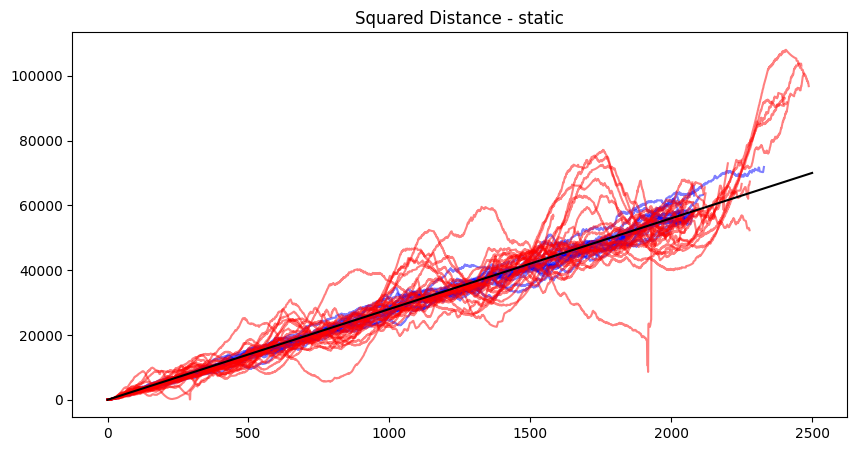

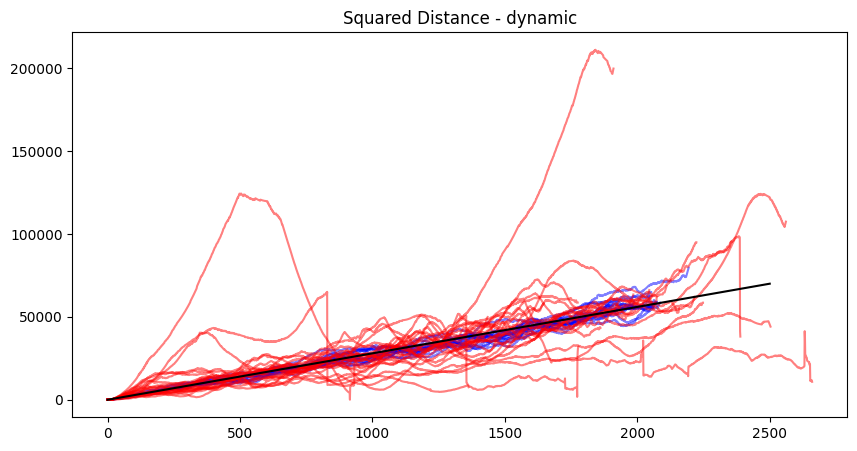

In [4]:

plt.figure(figsize=(10, 5))
for i, j in zip(trace_distances_all, names):
    if not 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        plt.plot(i, c=color, alpha=0.5)
plt.title('Squared Distance - static')
plt.plot([0,2500], [0,70000], 'k')
plt.show()

plt.figure(figsize=(10, 5))
for i, j in zip(trace_distances_all, names):
    if 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        plt.plot(i, c=color, alpha=0.5)
plt.title('Squared Distance - dynamic')
plt.plot([0,2500], [0,70000], 'k')

## Squared Angle

In [5]:
trace_angle_continuous = angle_cont_func(trace_angle_all)


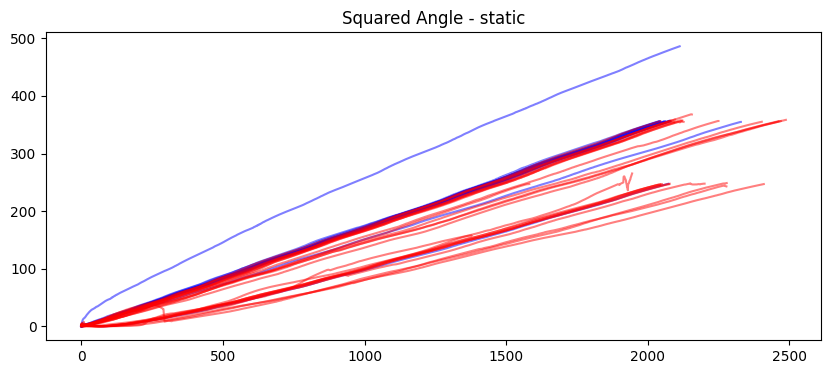

Text(0.5, 1.0, 'Squared Angle - dynamic')

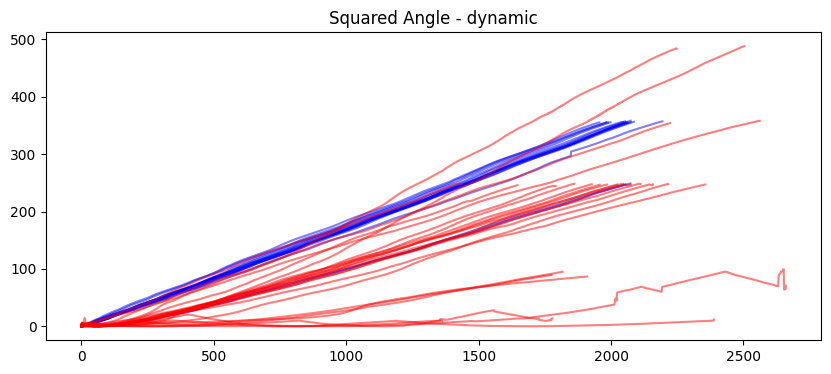

In [6]:

plt.figure(figsize=(10, 4))
for i, j in zip(trace_angle_continuous, names):
    if not 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        i = [k*k for k in i] 
        #i = signal.resample(i, 2500)
        plt.plot(i, c=color, alpha=0.5)
plt.title('Squared Angle - static')
#plt.yscale('log')
plt.show()

plt.figure(figsize=(10, 4))
for i, j in zip(trace_angle_continuous, names):
    if 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        i = [k*k for k in i] 
        #i = signal.resample(i, 2500)
        plt.plot(i, c=color, alpha=0.5)
plt.title('Squared Angle - dynamic')

## Reversed angle

In [7]:
angles_reversed = angle_cont_func([list(reversed(i)) for i in trace_angle_all])

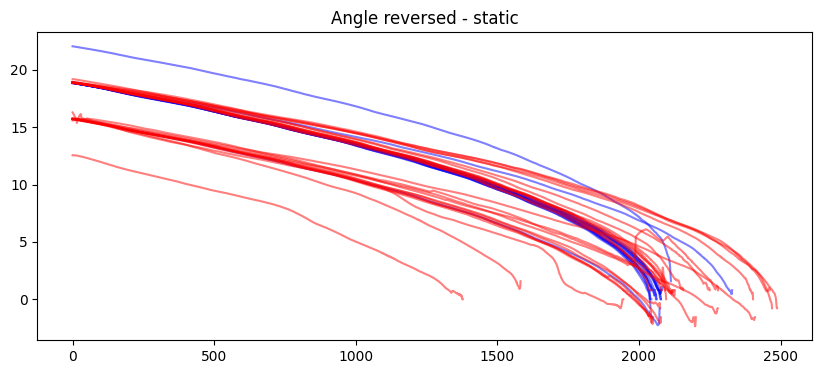

Text(0.5, 1.0, 'Angle reversed - dynamic')

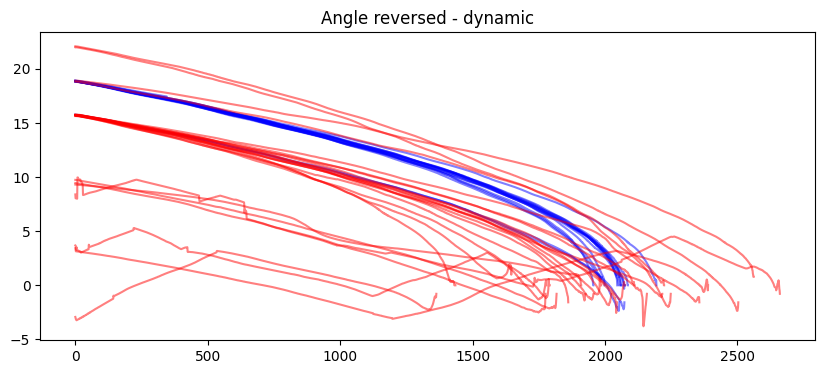

In [8]:
plt.figure(figsize=(10, 4))
for i, j in zip(angles_reversed, names):
    if not 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        #i = [k*k for k in i] 
        plt.plot(i, c=color, alpha=0.5)
plt.title('Angle reversed - static')
#plt.yscale('log')
plt.show()

plt.figure(figsize=(10, 4))
for i, j in zip(angles_reversed, names):
    if 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        #i = [k*k for k in i] 
        plt.plot(i, c=color, alpha=0.5)
plt.title('Angle reversed - dynamic')

## All Spirals that were extracted

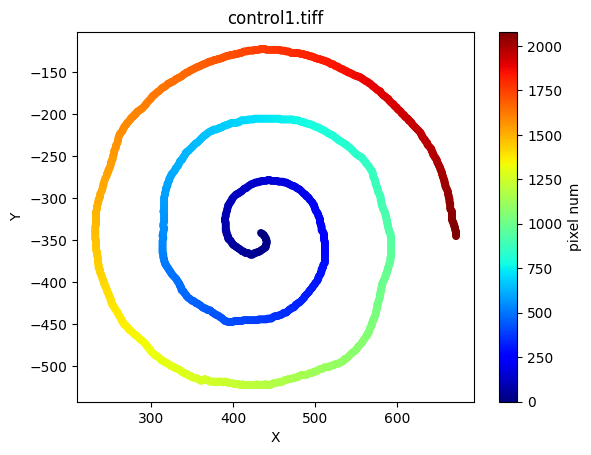

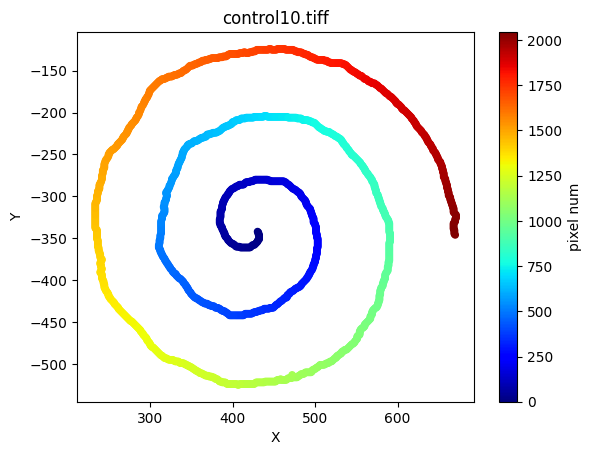

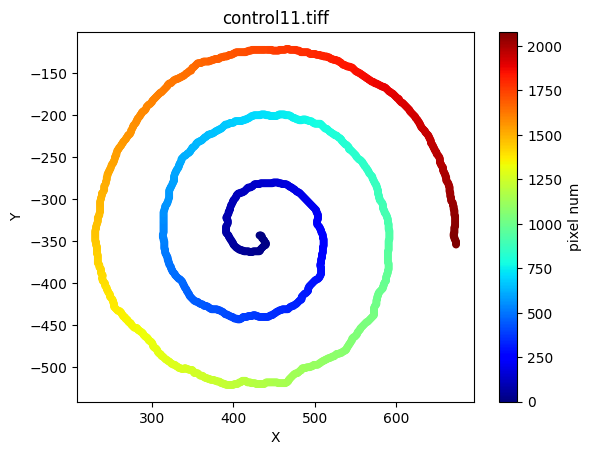

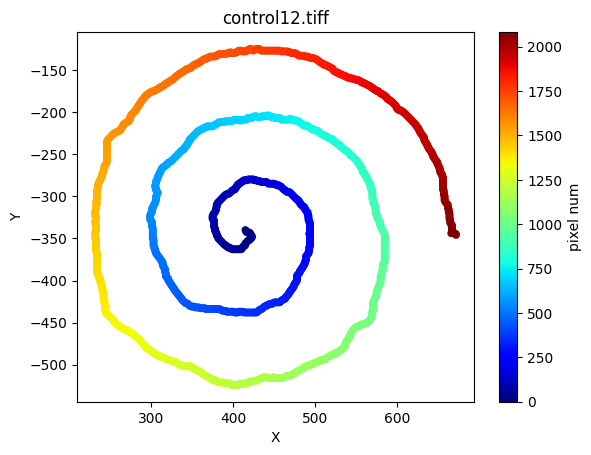

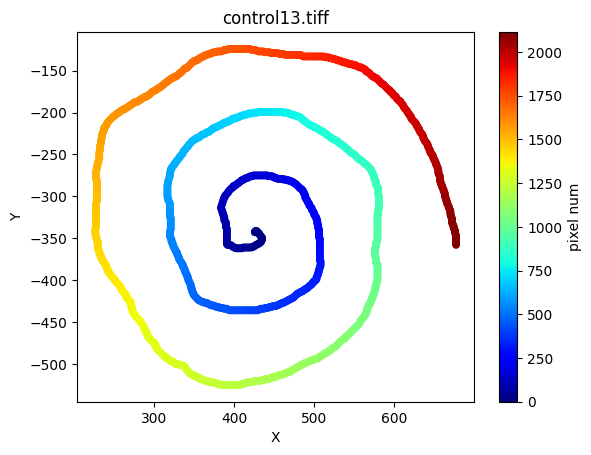

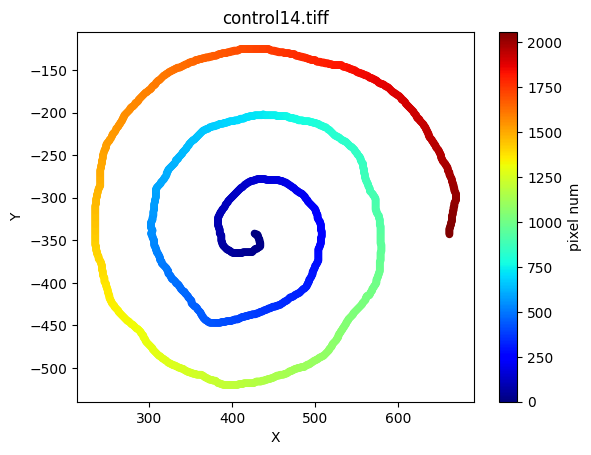

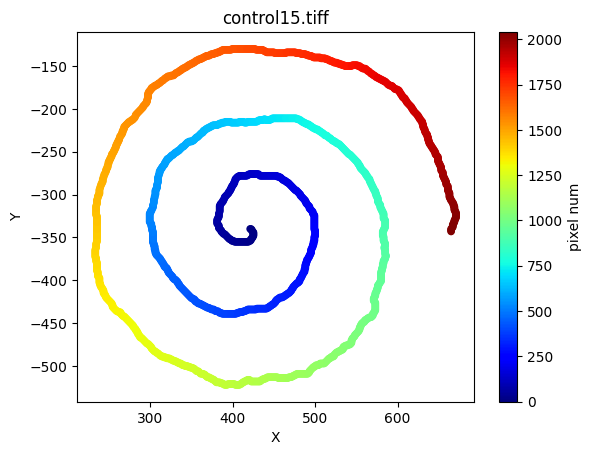

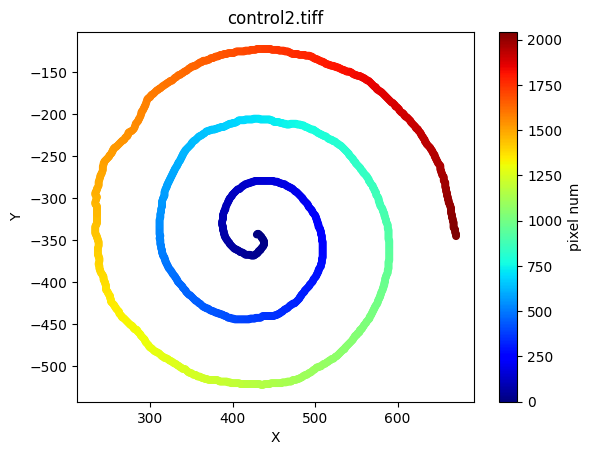

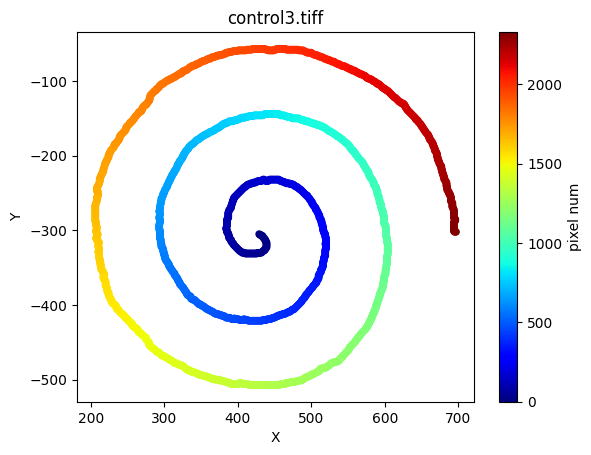

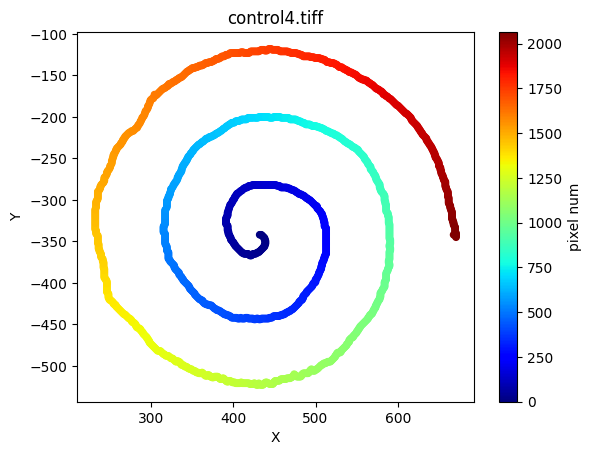

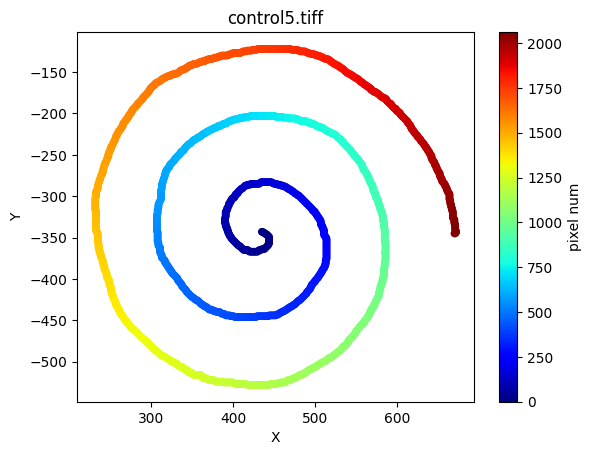

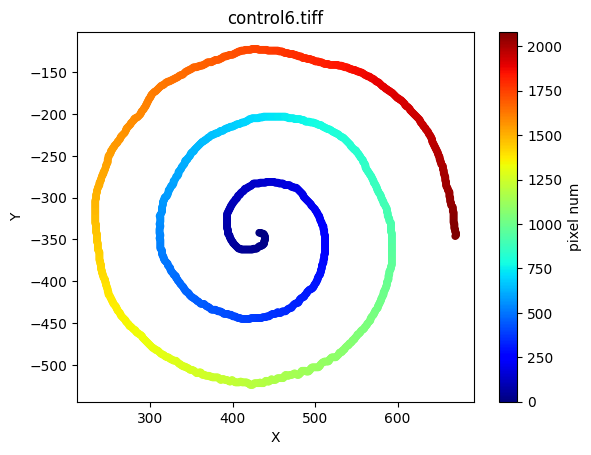

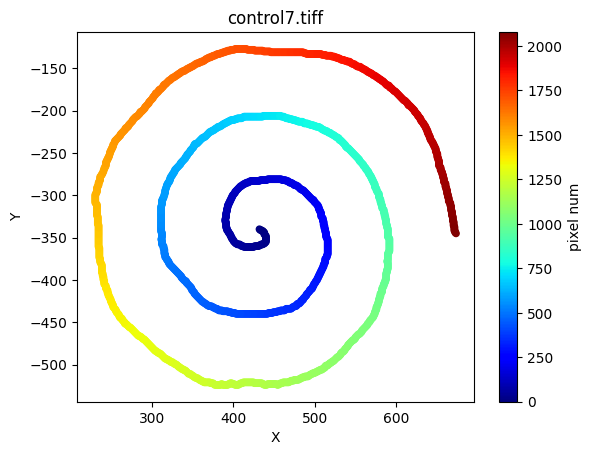

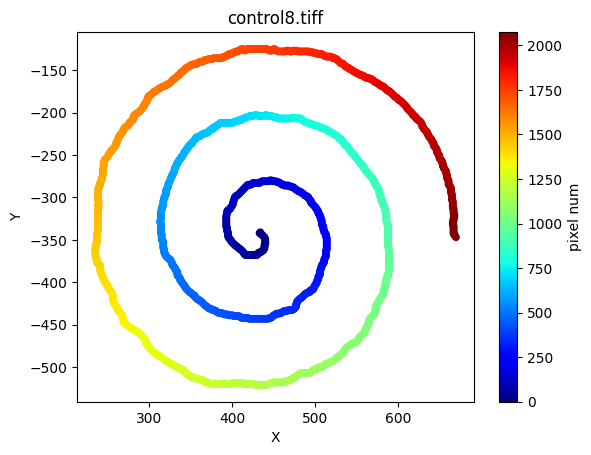

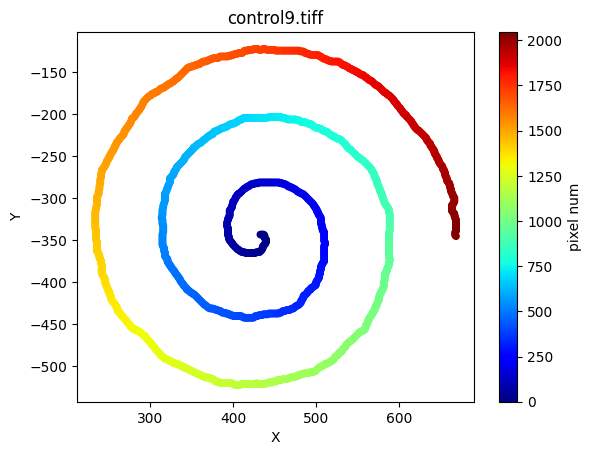

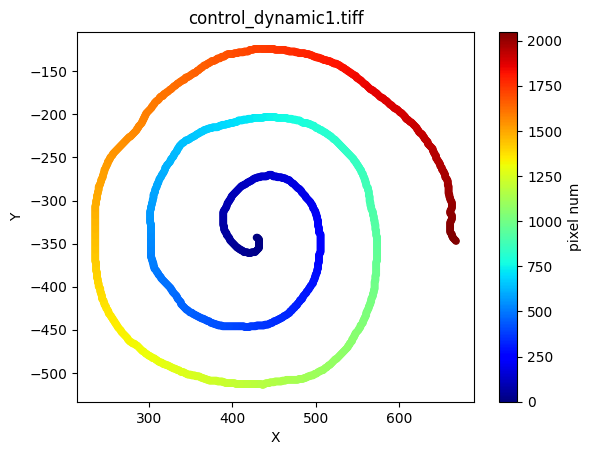

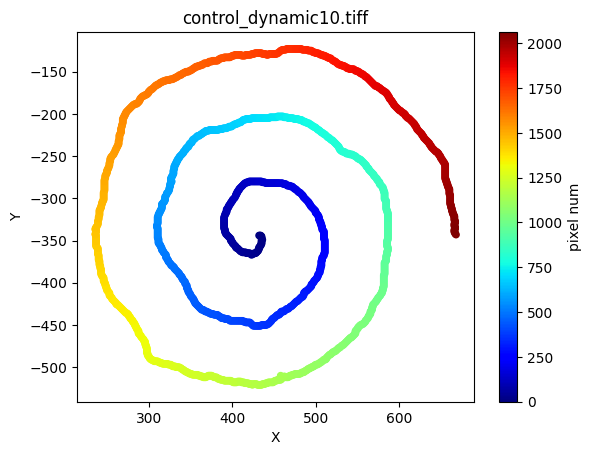

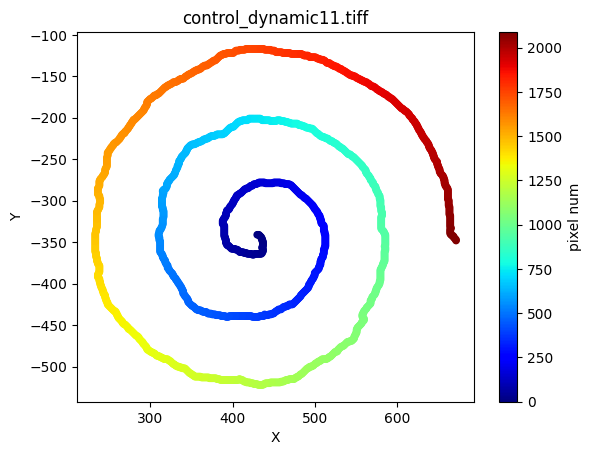

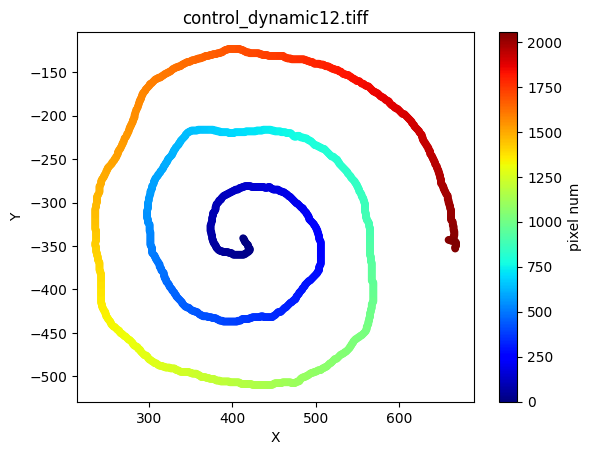

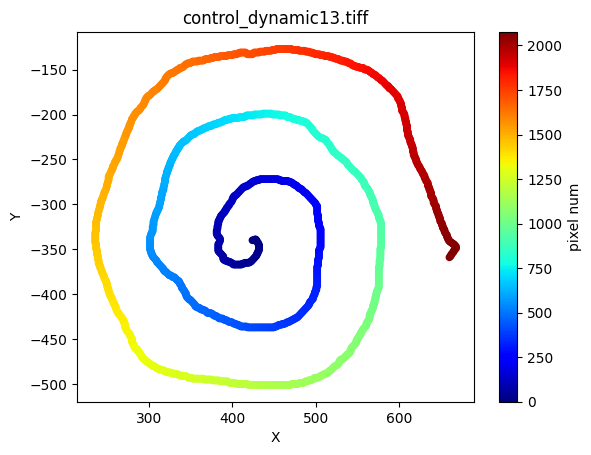

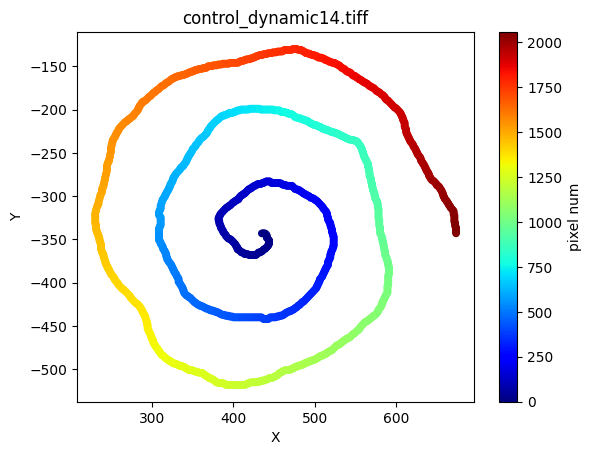

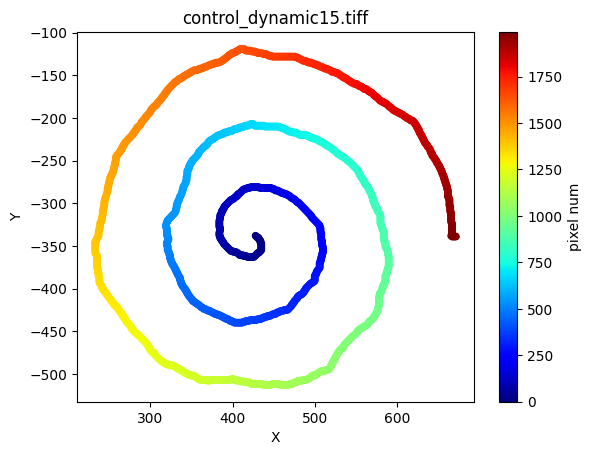

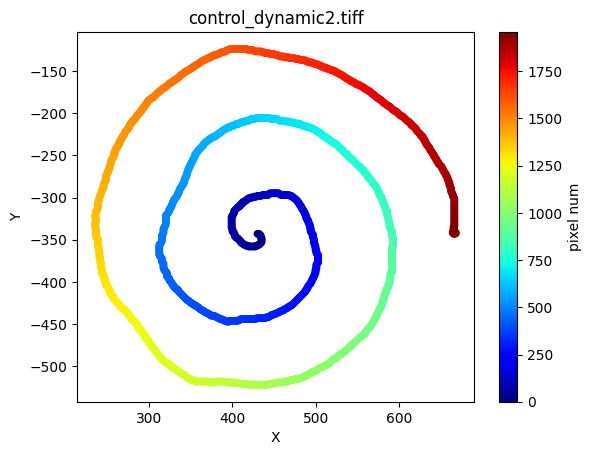

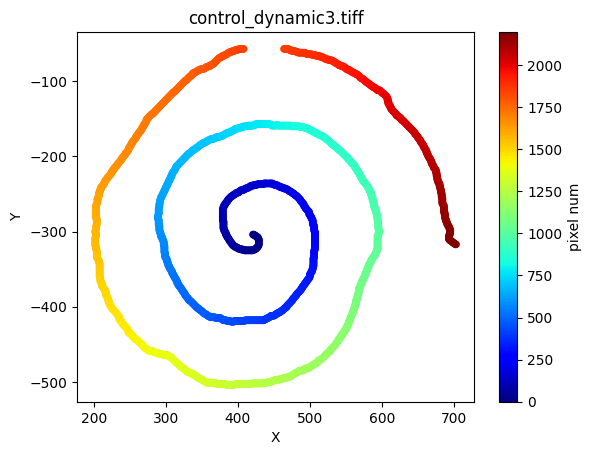

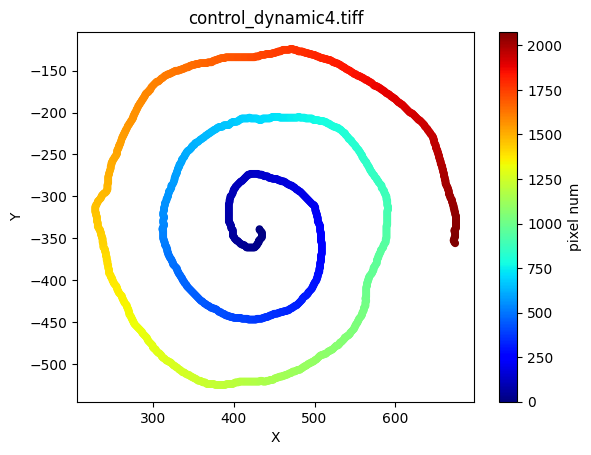

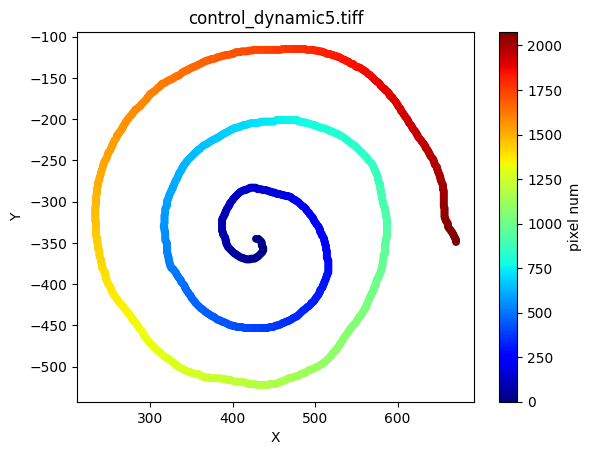

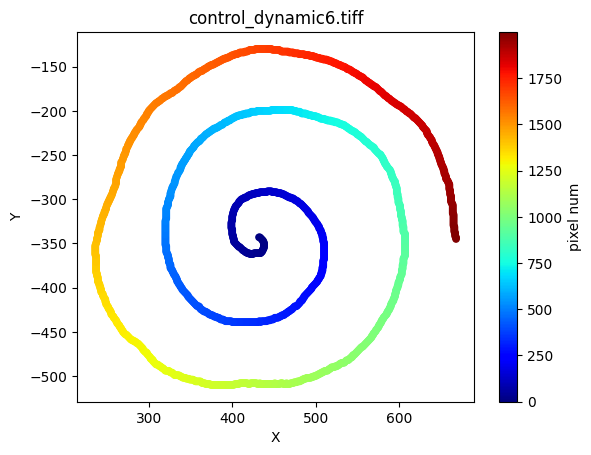

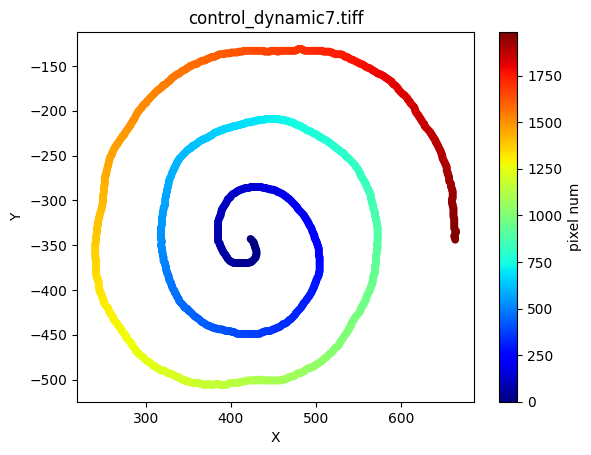

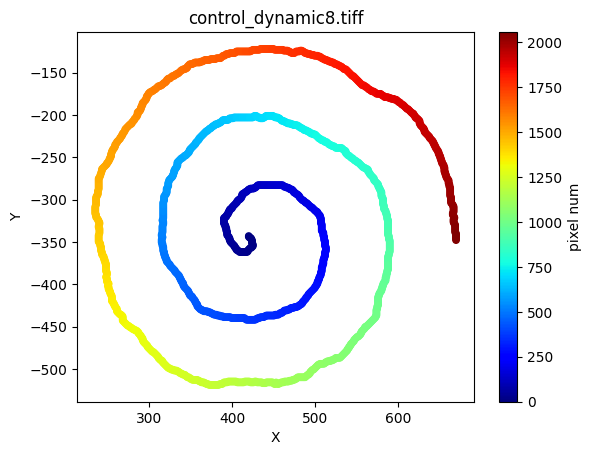

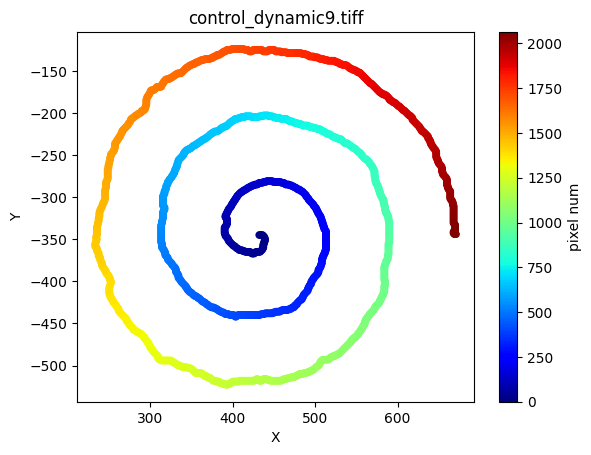

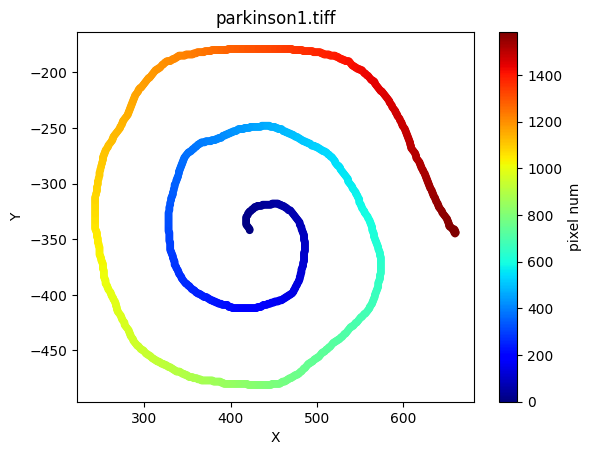

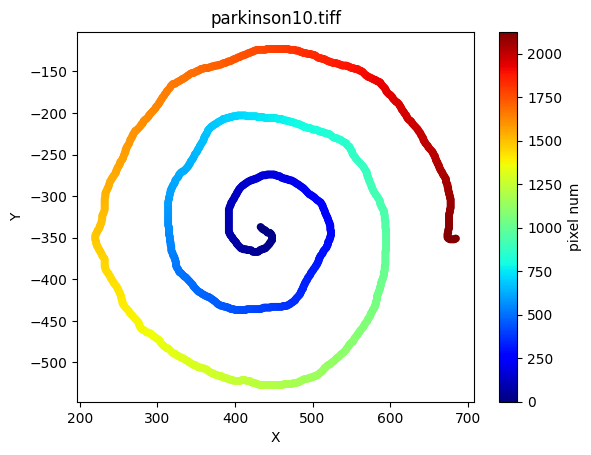

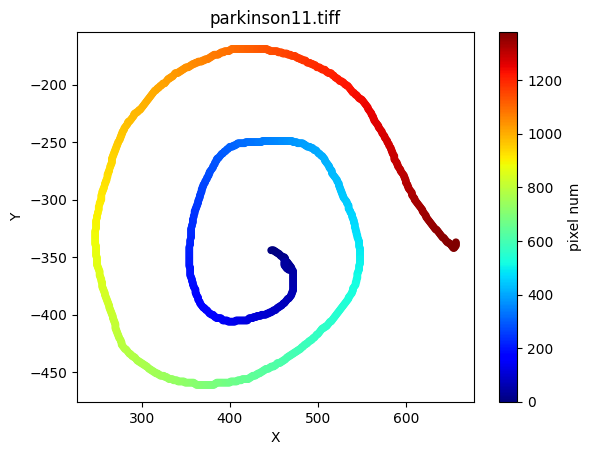

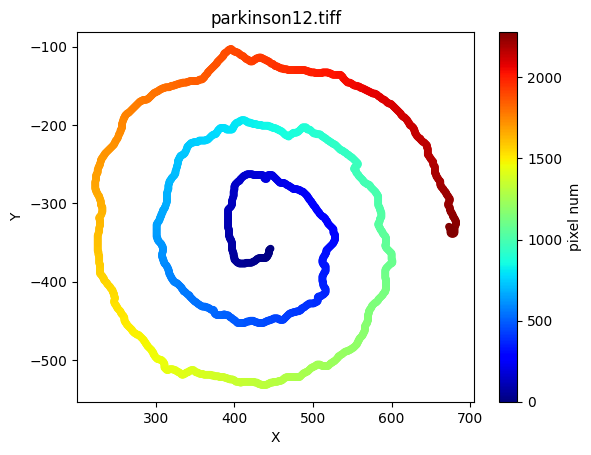

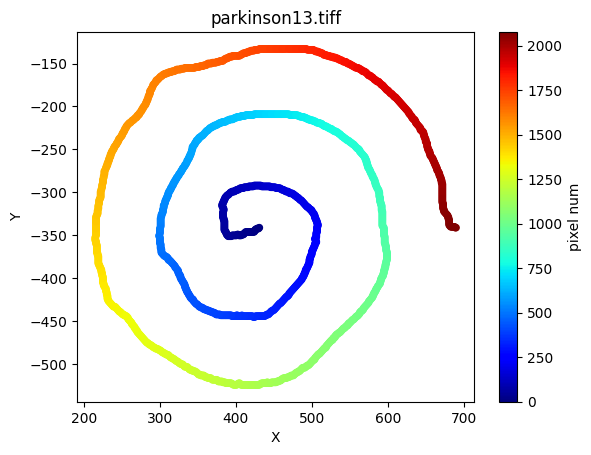

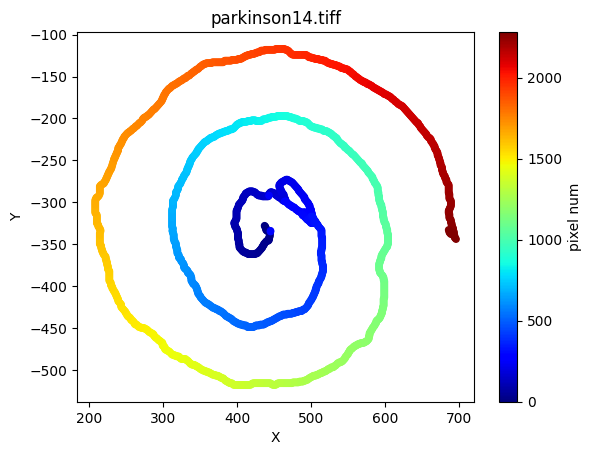

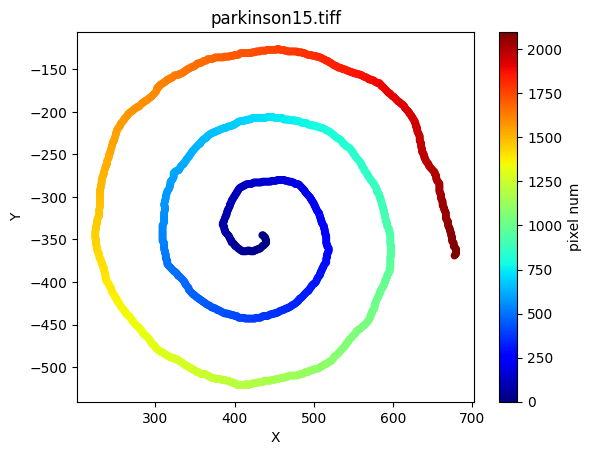

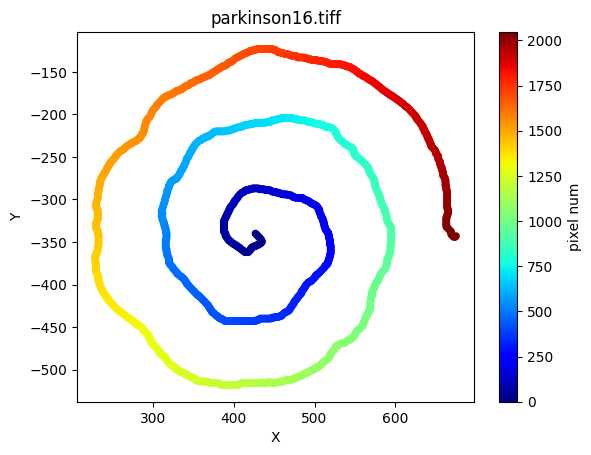

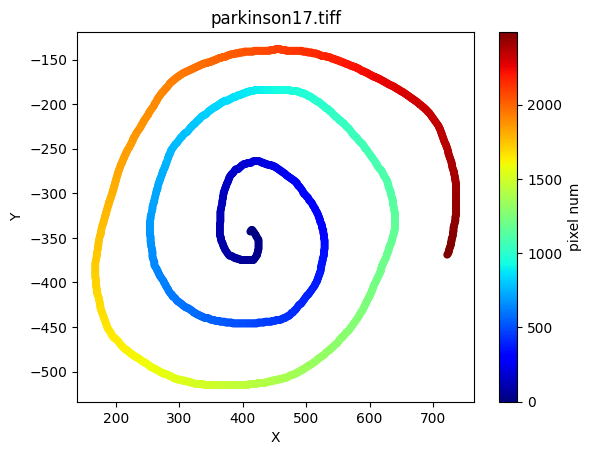

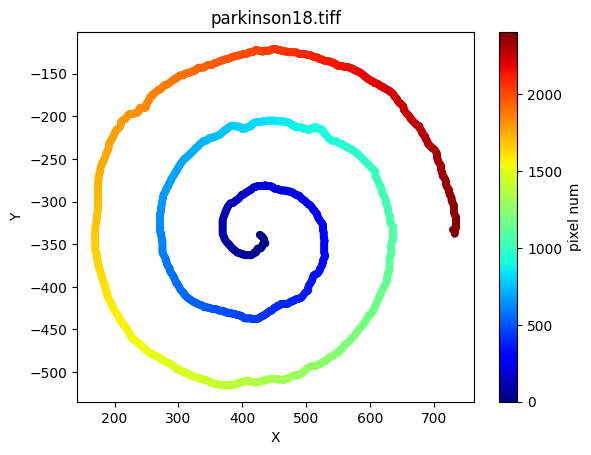

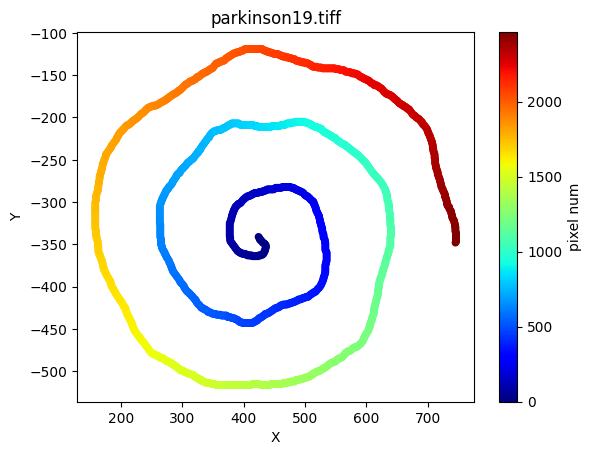

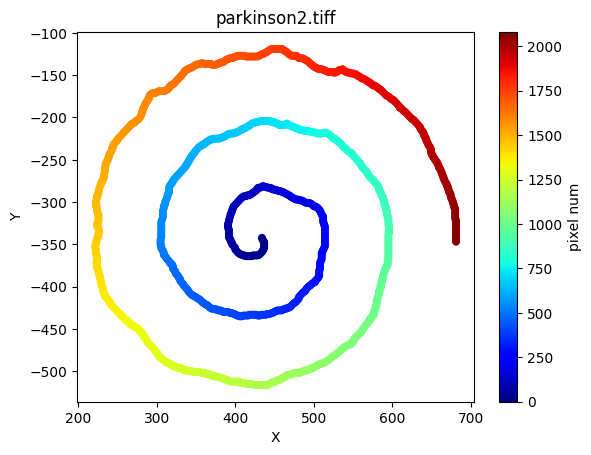

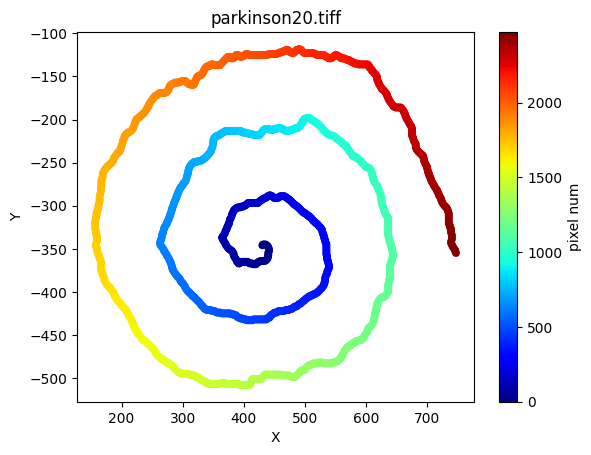

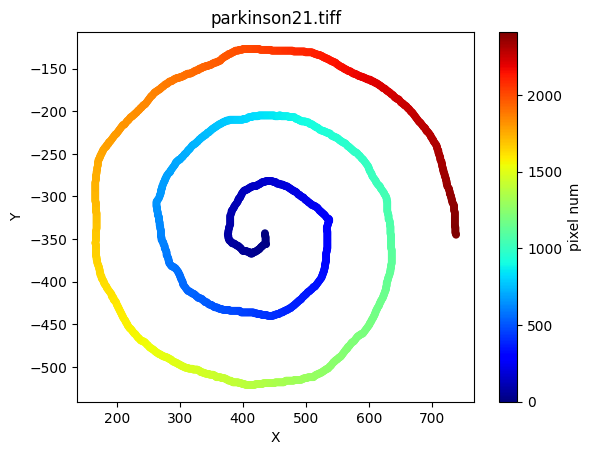

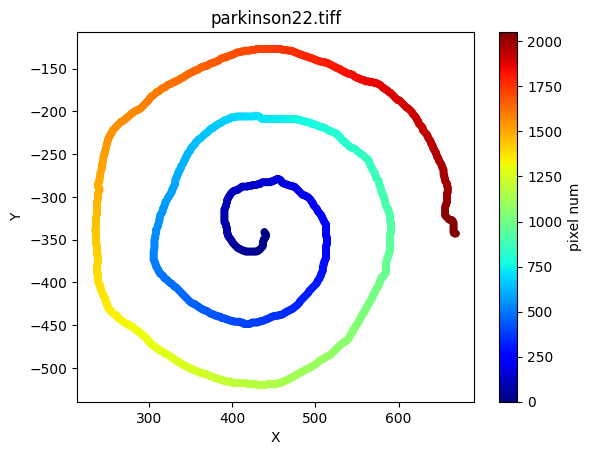

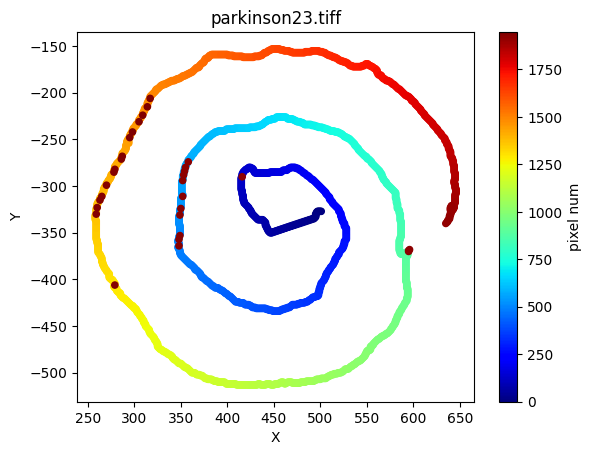

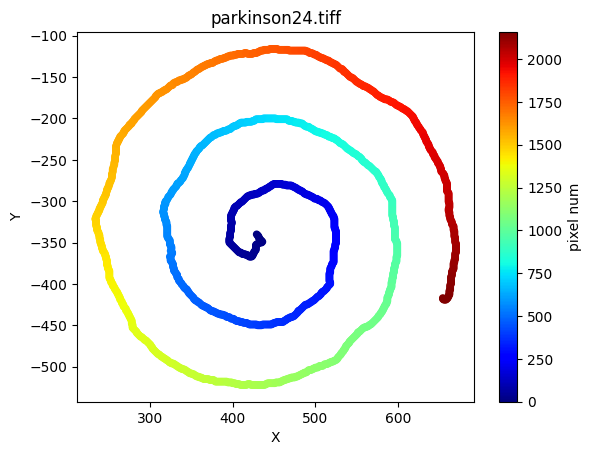

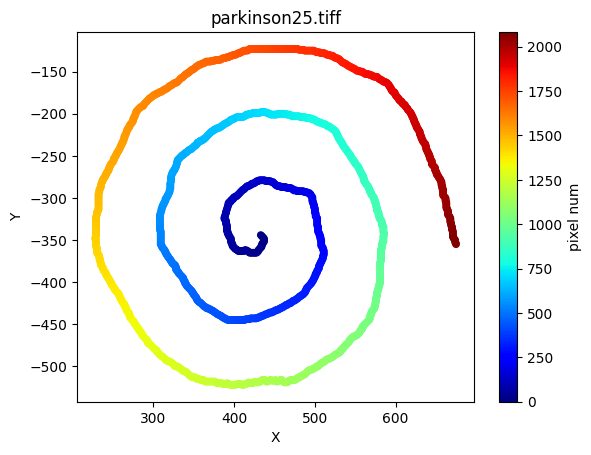

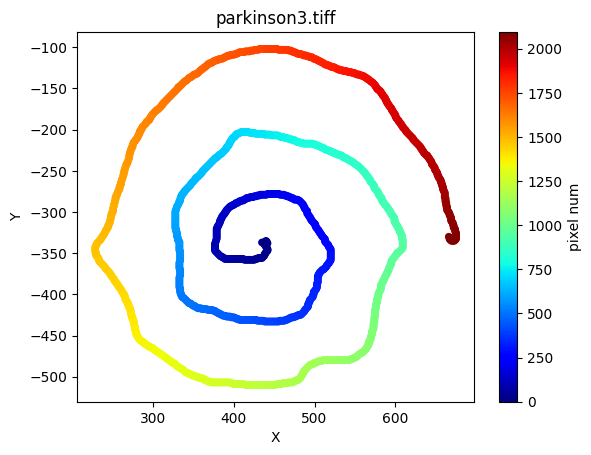

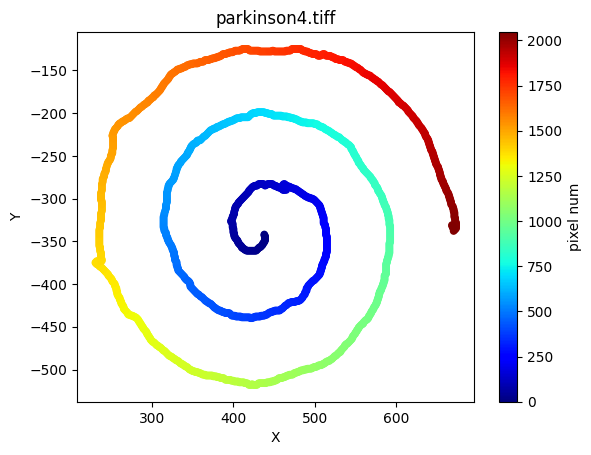

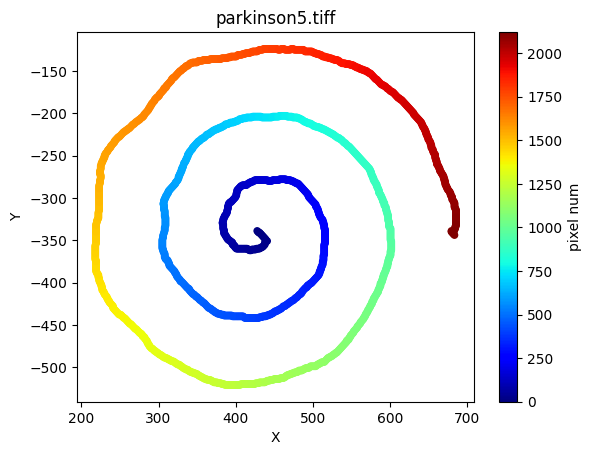

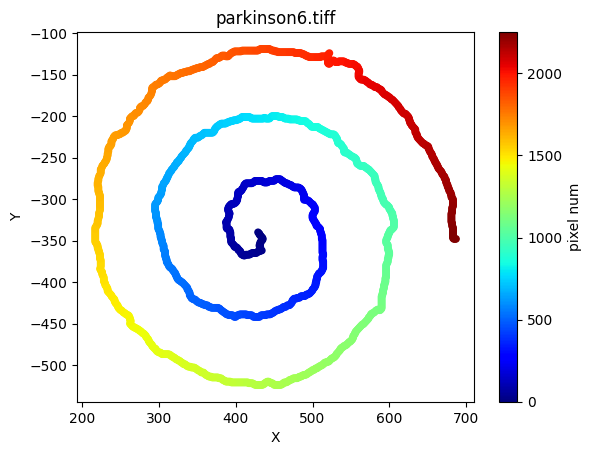

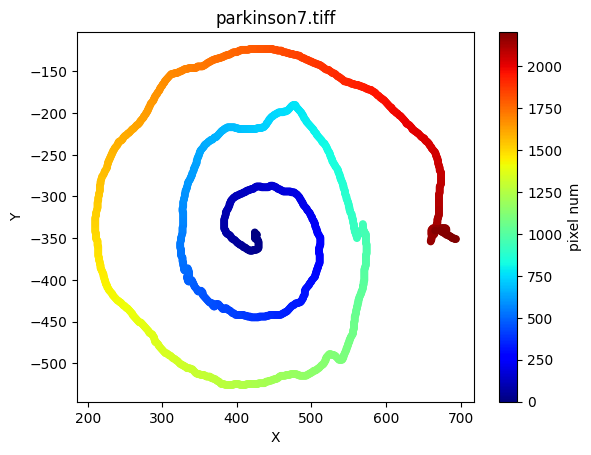

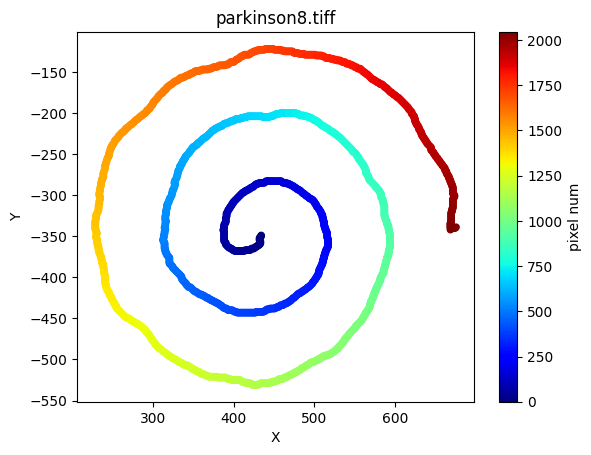

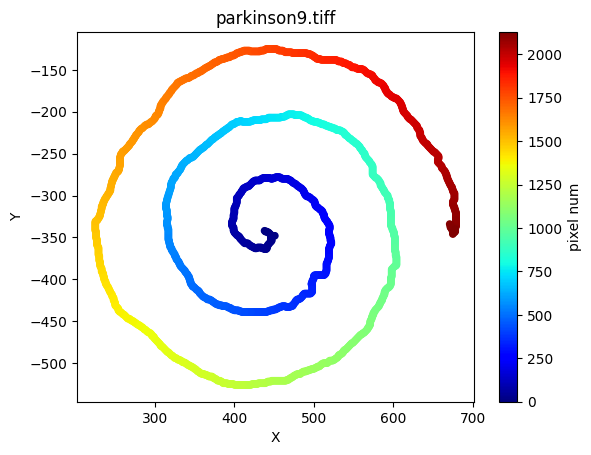

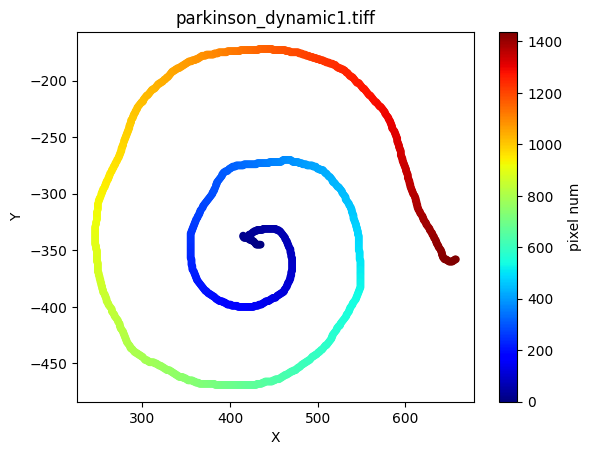

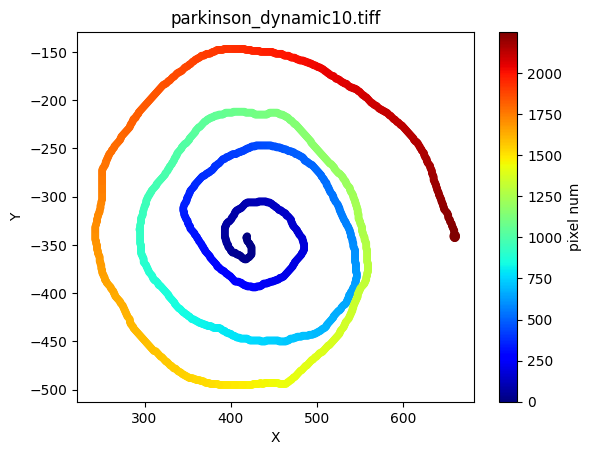

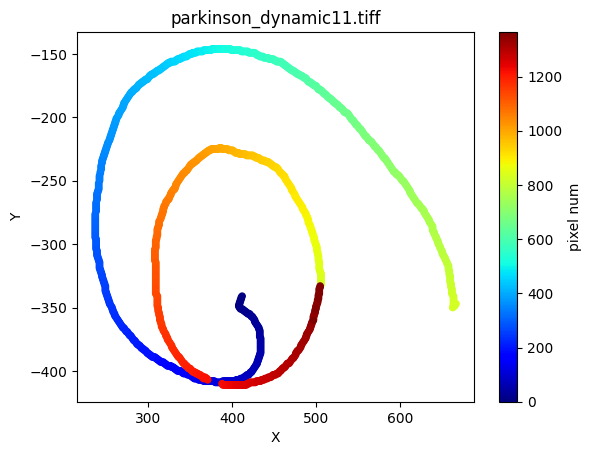

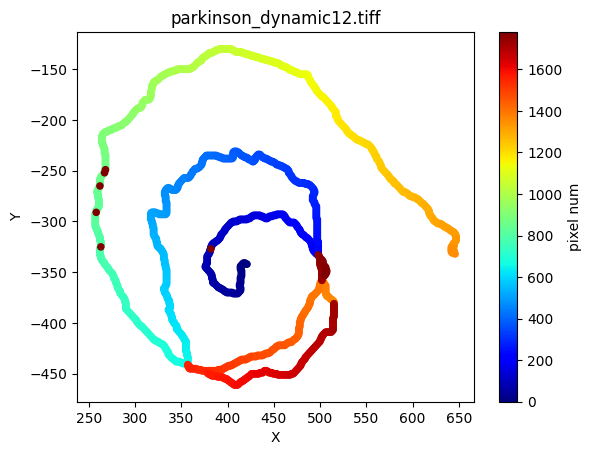

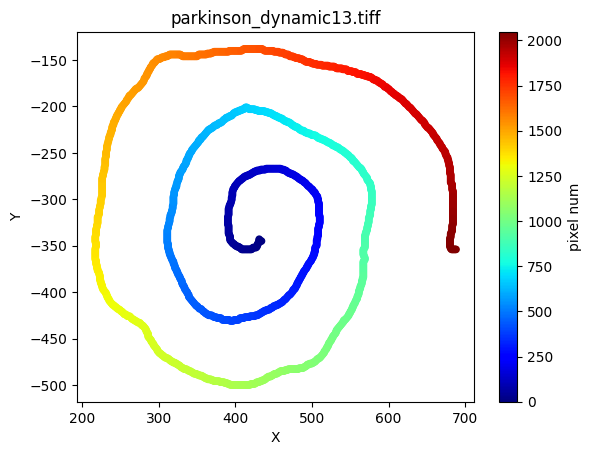

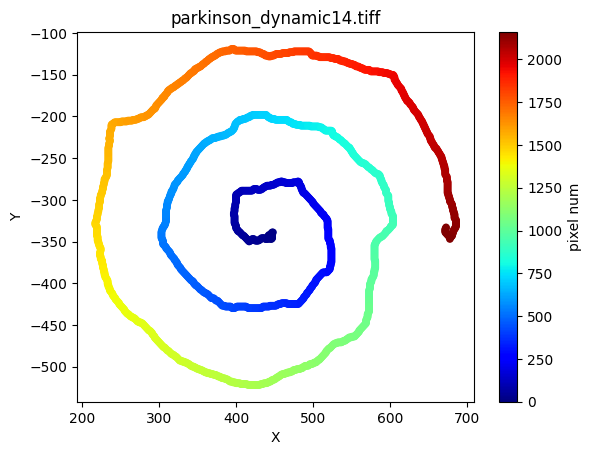

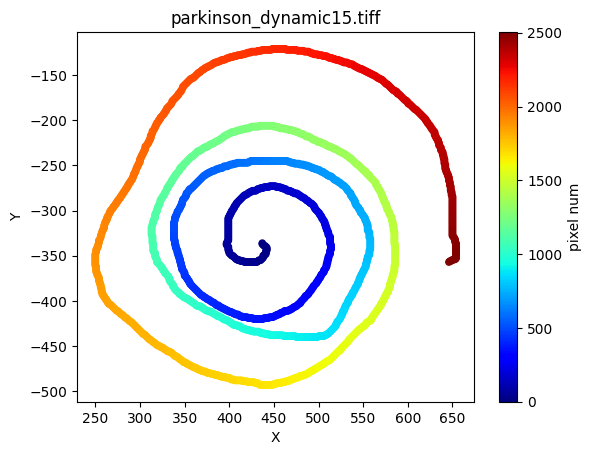

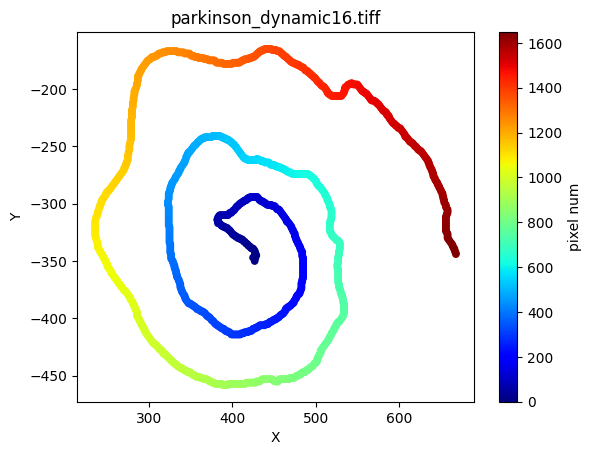

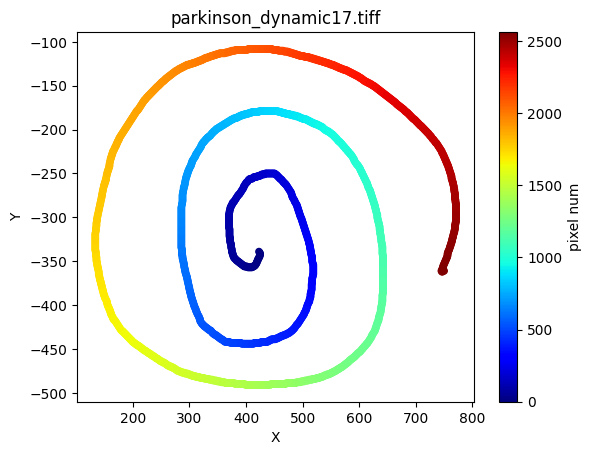

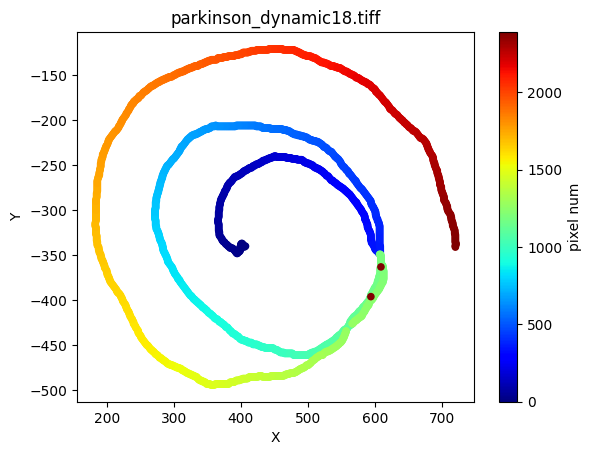

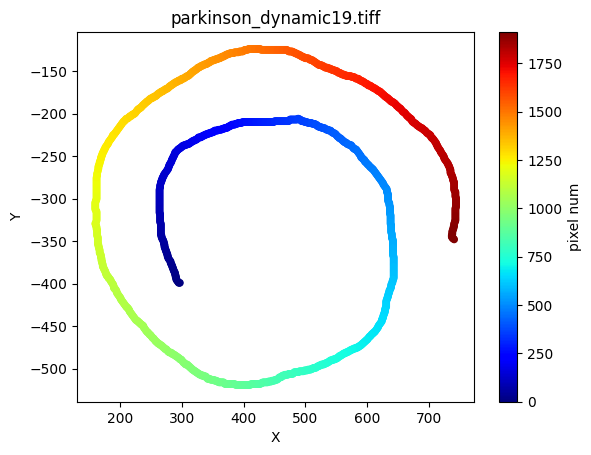

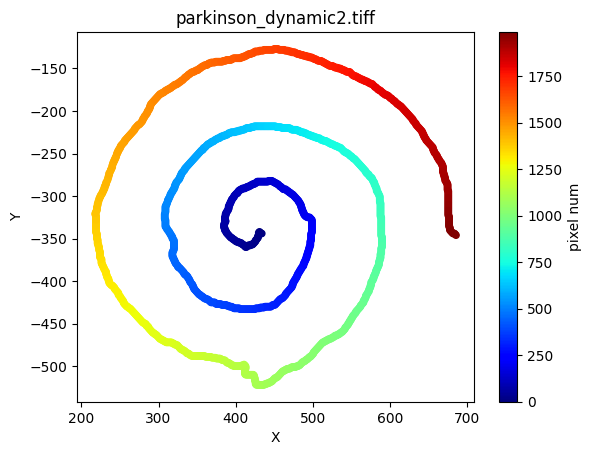

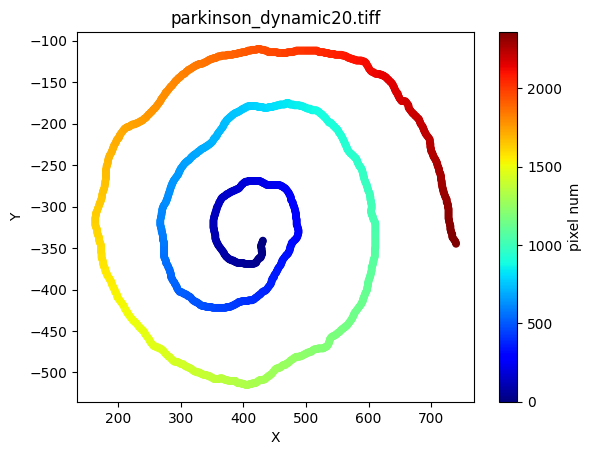

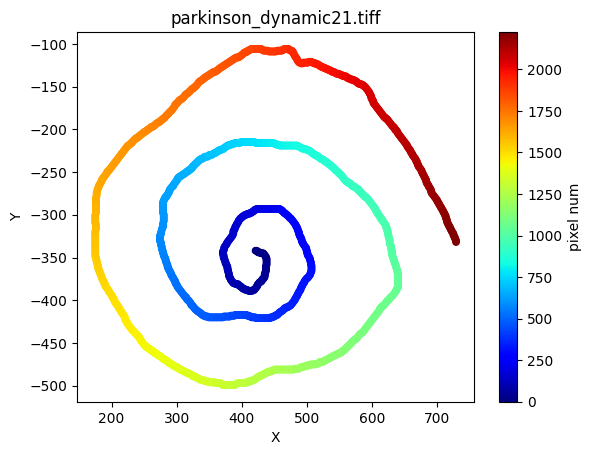

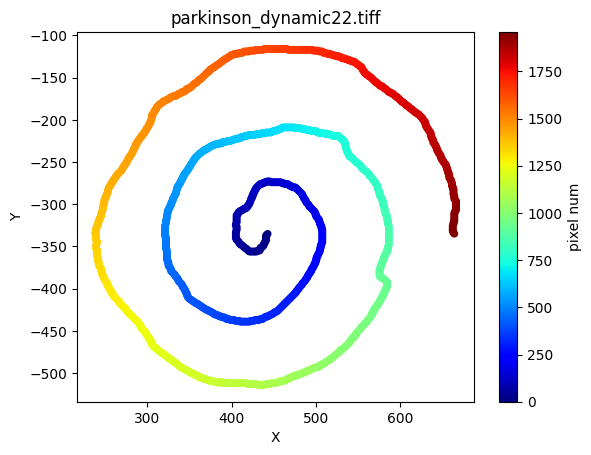

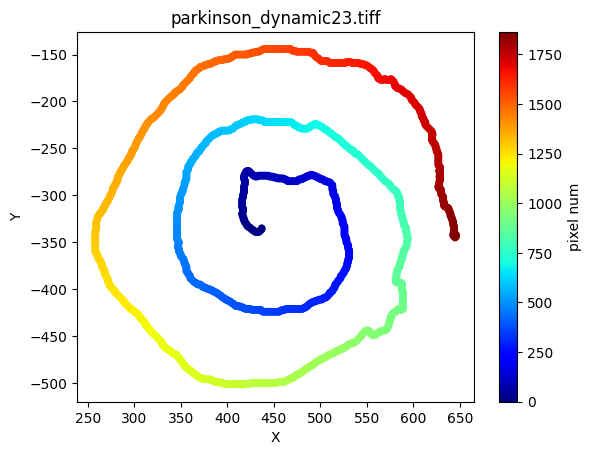

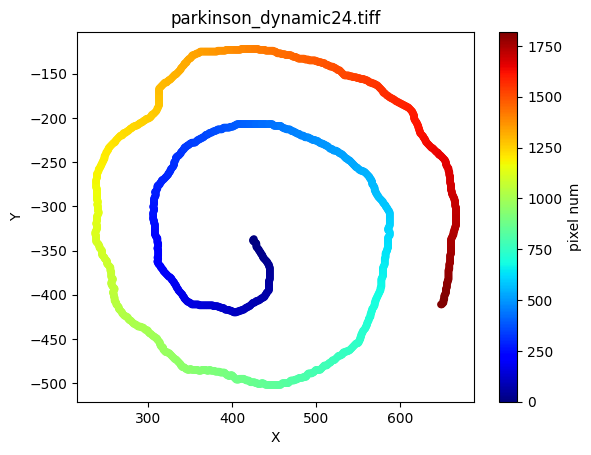

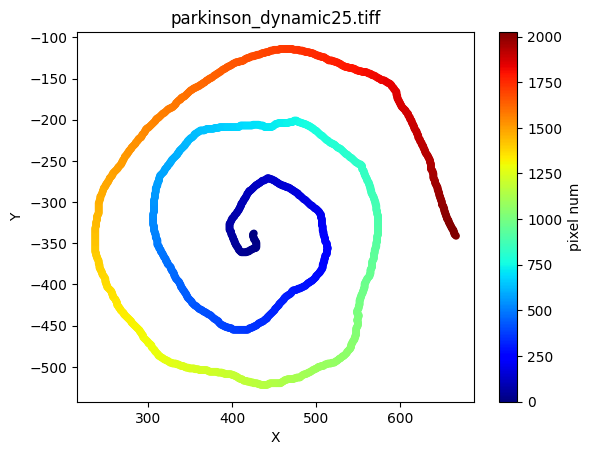

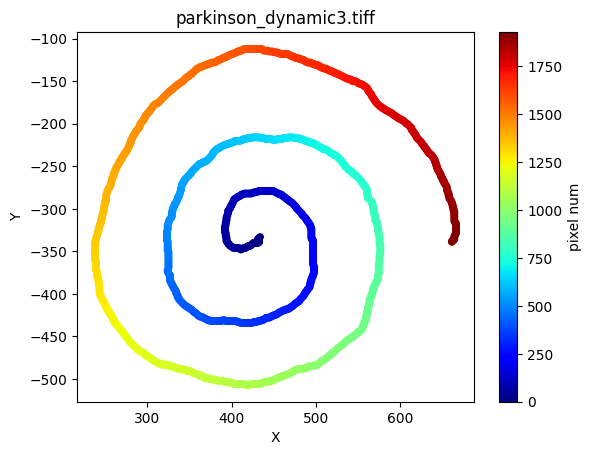

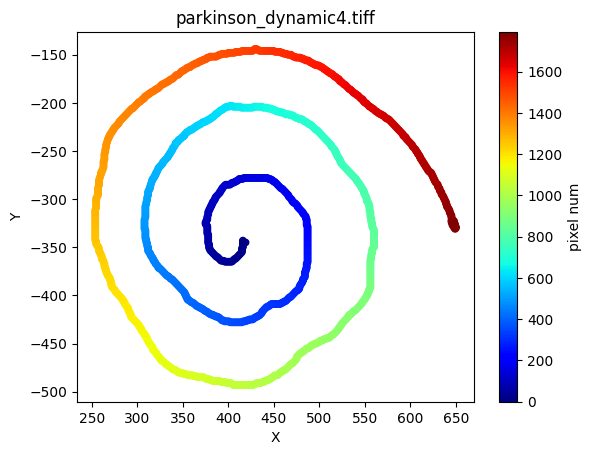

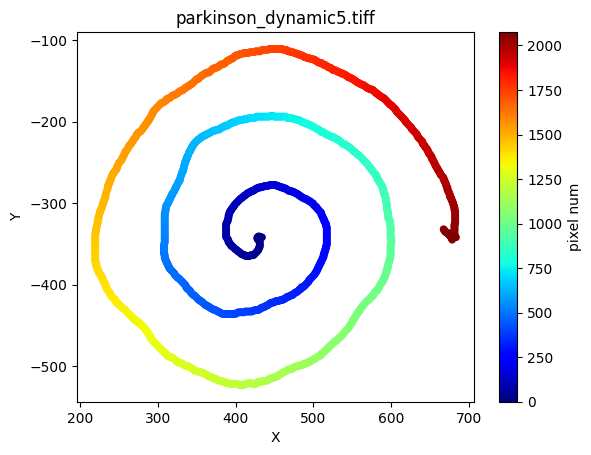

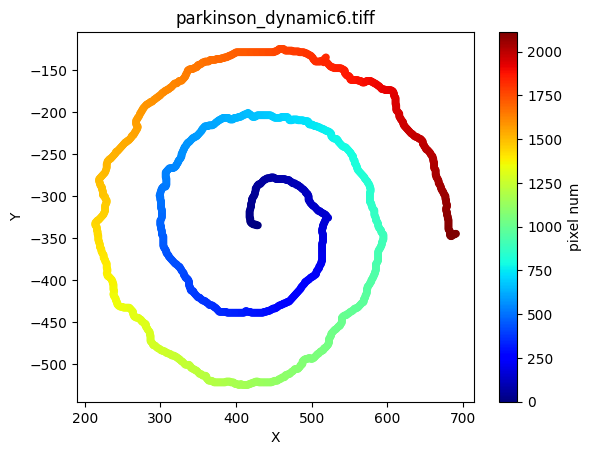

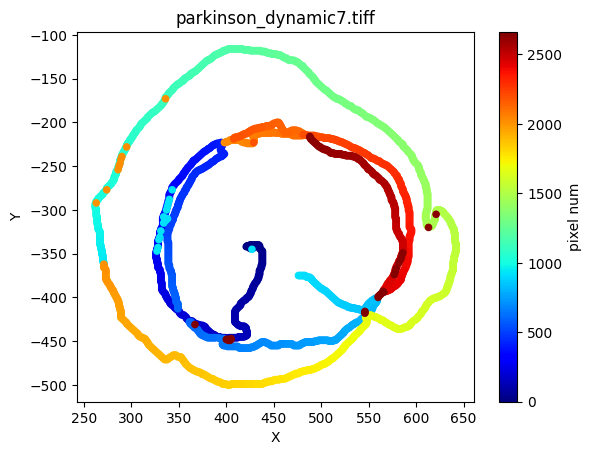

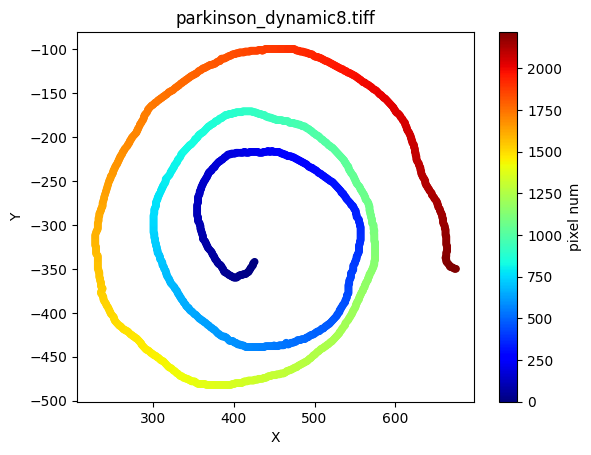

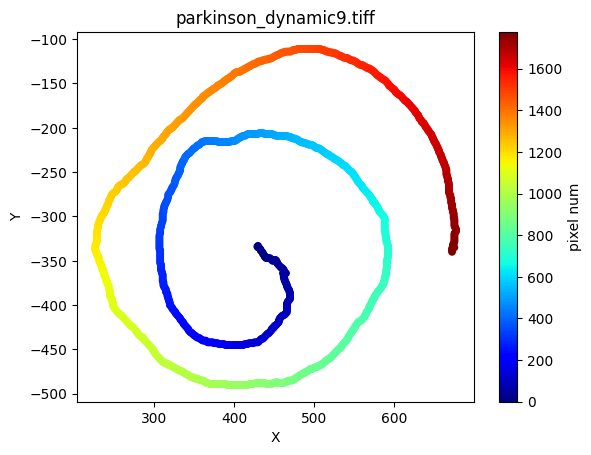

In [9]:
#trace_path
for trace_path, n in zip(all_paths, names):
    trace_path_time = np.array([[i[0], -i[1], j] for j, i in enumerate(trace_path)])
    
    plt.scatter(trace_path_time[:,0], trace_path_time[:,1], c=trace_path_time[:,2], s=20, cmap='jet')
    plt.colorbar(label='pixel num')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(n)
    plt.show()

## Closer look at static data

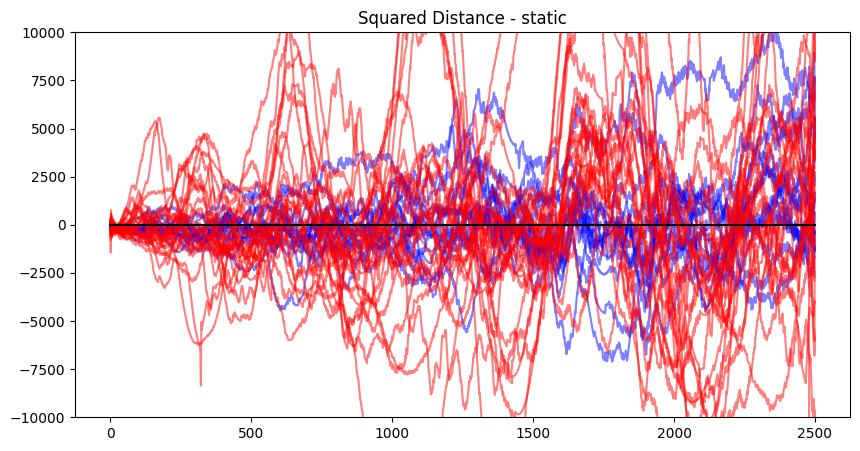

In [10]:
plt.figure(figsize=(10, 5))
static = {}
for i, j in zip(trace_distances_all, names):
    if not 'dynamic' in j:
        color = 'red' if 'parkinson' in j else 'blue'
        static[j] = {}
        static[j]['original'] = i
        static[j]['resampled'] = signal.resample(i, 2500)
        i = [k-index*27.5 for index, k in enumerate(i)]
        i = signal.resample(i, 2500)
        static[j]['data'] = i 
        static[j]['fft'] = np.fft.fft(i)
        plt.plot(i, c=color, alpha=0.5)
plt.title('Squared Distance - static')
plt.plot([0,2500], [0,0], 'k')
plt.ylim((-1e4, 1e4))
plt.show()

### Power Density Spectrum

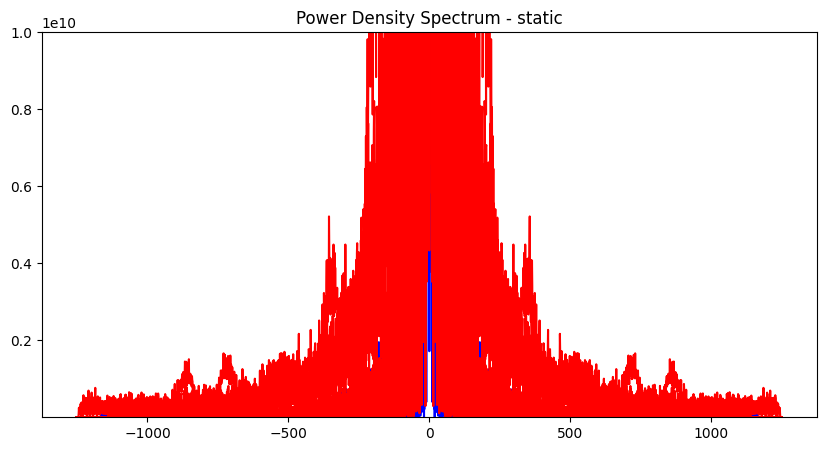

In [11]:
plt.figure(figsize=(10, 5))
for i in static:
    p = 'red' if 'parkinson' in i else 'blue'
    tmp = [abs(k)**2 + 1 for k in static[i]['fft']]
    plt.plot([i for i in range(-1250, 1250)], tmp[1250:] + tmp[:1250], c=p)
plt.title('Power Density Spectrum - static')
#plt.yscale('log')
plt.ylim((1e3, 1e10))
plt.show()

### Autocorrelation 

Keep in mind, autocorrelation is the fourier transormation of the PDS.

The plot here is shifted...

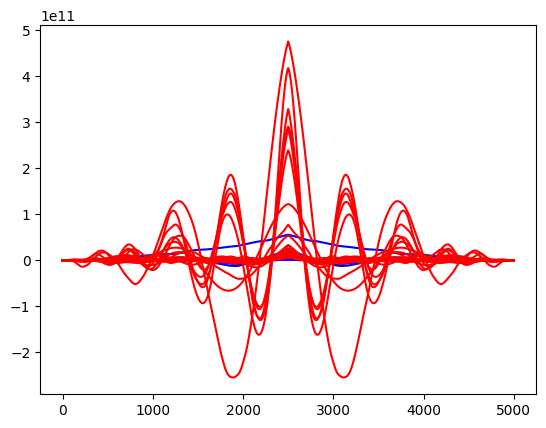

In [12]:
for i in static:
    p = 'red' if 'parkinson' in i else 'blue'
    #plt.scatter(static[i]['std'], static[i]['fft'][0], c=p)
    tmp = signal.correlate(static[i]['data'], static[i]['data'])
    plt.plot(tmp, c=p)
    #break

This is an approach to find two trivial statistics that make a separation of parkinson and control possible.

The std of the spiral-template is an intuitive feature that shows already being effective.
Also the fft(0) which is nothing but the sum of all points of spiral-template proves to be a valid feature.

The problem with both features is though that they depend on a template we do not have access to.

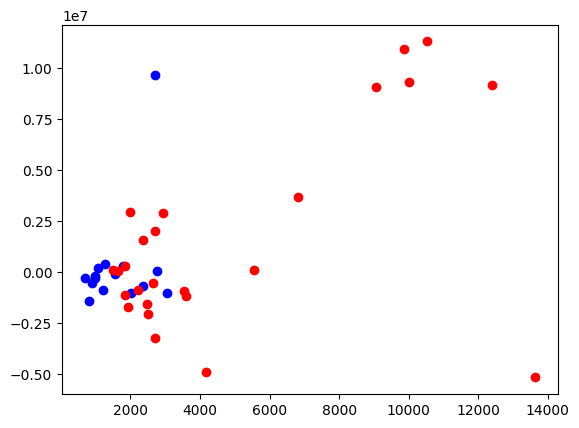

In [13]:
for i in static:
    p = 'red' if 'parkinson' in i else 'blue'
    # keep in mind, fft is complex 
    plt.scatter(np.std(static[i]['data']), np.real(static[i]['fft'][0]), c=p)
    